# Import modules and data

In [1]:
import torch as tc
tc.set_default_tensor_type(tc.DoubleTensor)

In [2]:
from __future__ import division
import sys, platform, os

import numpy as np
import scipy as sp
from scipy.optimize import root

# import MyHyperSphericaljl as jl
# import MyOtherFunctions as fun

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
l_array = np.arange(2000)

Dl_CMB = np.load('Dl_data/CMB_Dl.npy')
Dl_PGWB = np.load('Dl_data/PGWB_Dl.npy')
Dl_GWB_f01 = np.load('Dl_data/GWB_f01_Dl.npy')
Dl_GWB_f1 = np.load('Dl_data/GWB_f1_Dl.npy')
Dl_GWB_fm01 = np.load('Dl_data/GWB_fm01_Dl.npy')
Dl_GWB_fm1 = np.load('Dl_data/GWB_fm1_Dl.npy')
Dl_PTGWB = np.load('Dl_data/PTGWB_Dl.npy')

In [4]:
l_array_cross = np.arange(1973)

Cross_PGWB = np.load('Dl_data/PGWB_CMB_cross.npy', allow_pickle=True)
Cross_GWB_f01 = np.load('Dl_data/GWB_CMB_f01_cross.npy', allow_pickle=True)
Cross_GWB_f1 = np.load('Dl_data/GWB_CMB_f1_cross.npy', allow_pickle=True)
Cross_GWB_fm01 = np.load('Dl_data/GWB_CMB_fm01_cross.npy', allow_pickle=True)
Cross_GWB_fm1 = np.load('Dl_data/GWB_CMB_fm1_cross.npy', allow_pickle=True)
Cross_PTGWB = np.load('Dl_data/PTGWB_CMB_cross.npy', allow_pickle=True)

# Plots PGWB, FOPT-GW, and SIGW with $f_{\mathrm{NL}}=\pm 0.1, \pm 1$

## Auto angular power spectrum of GWB

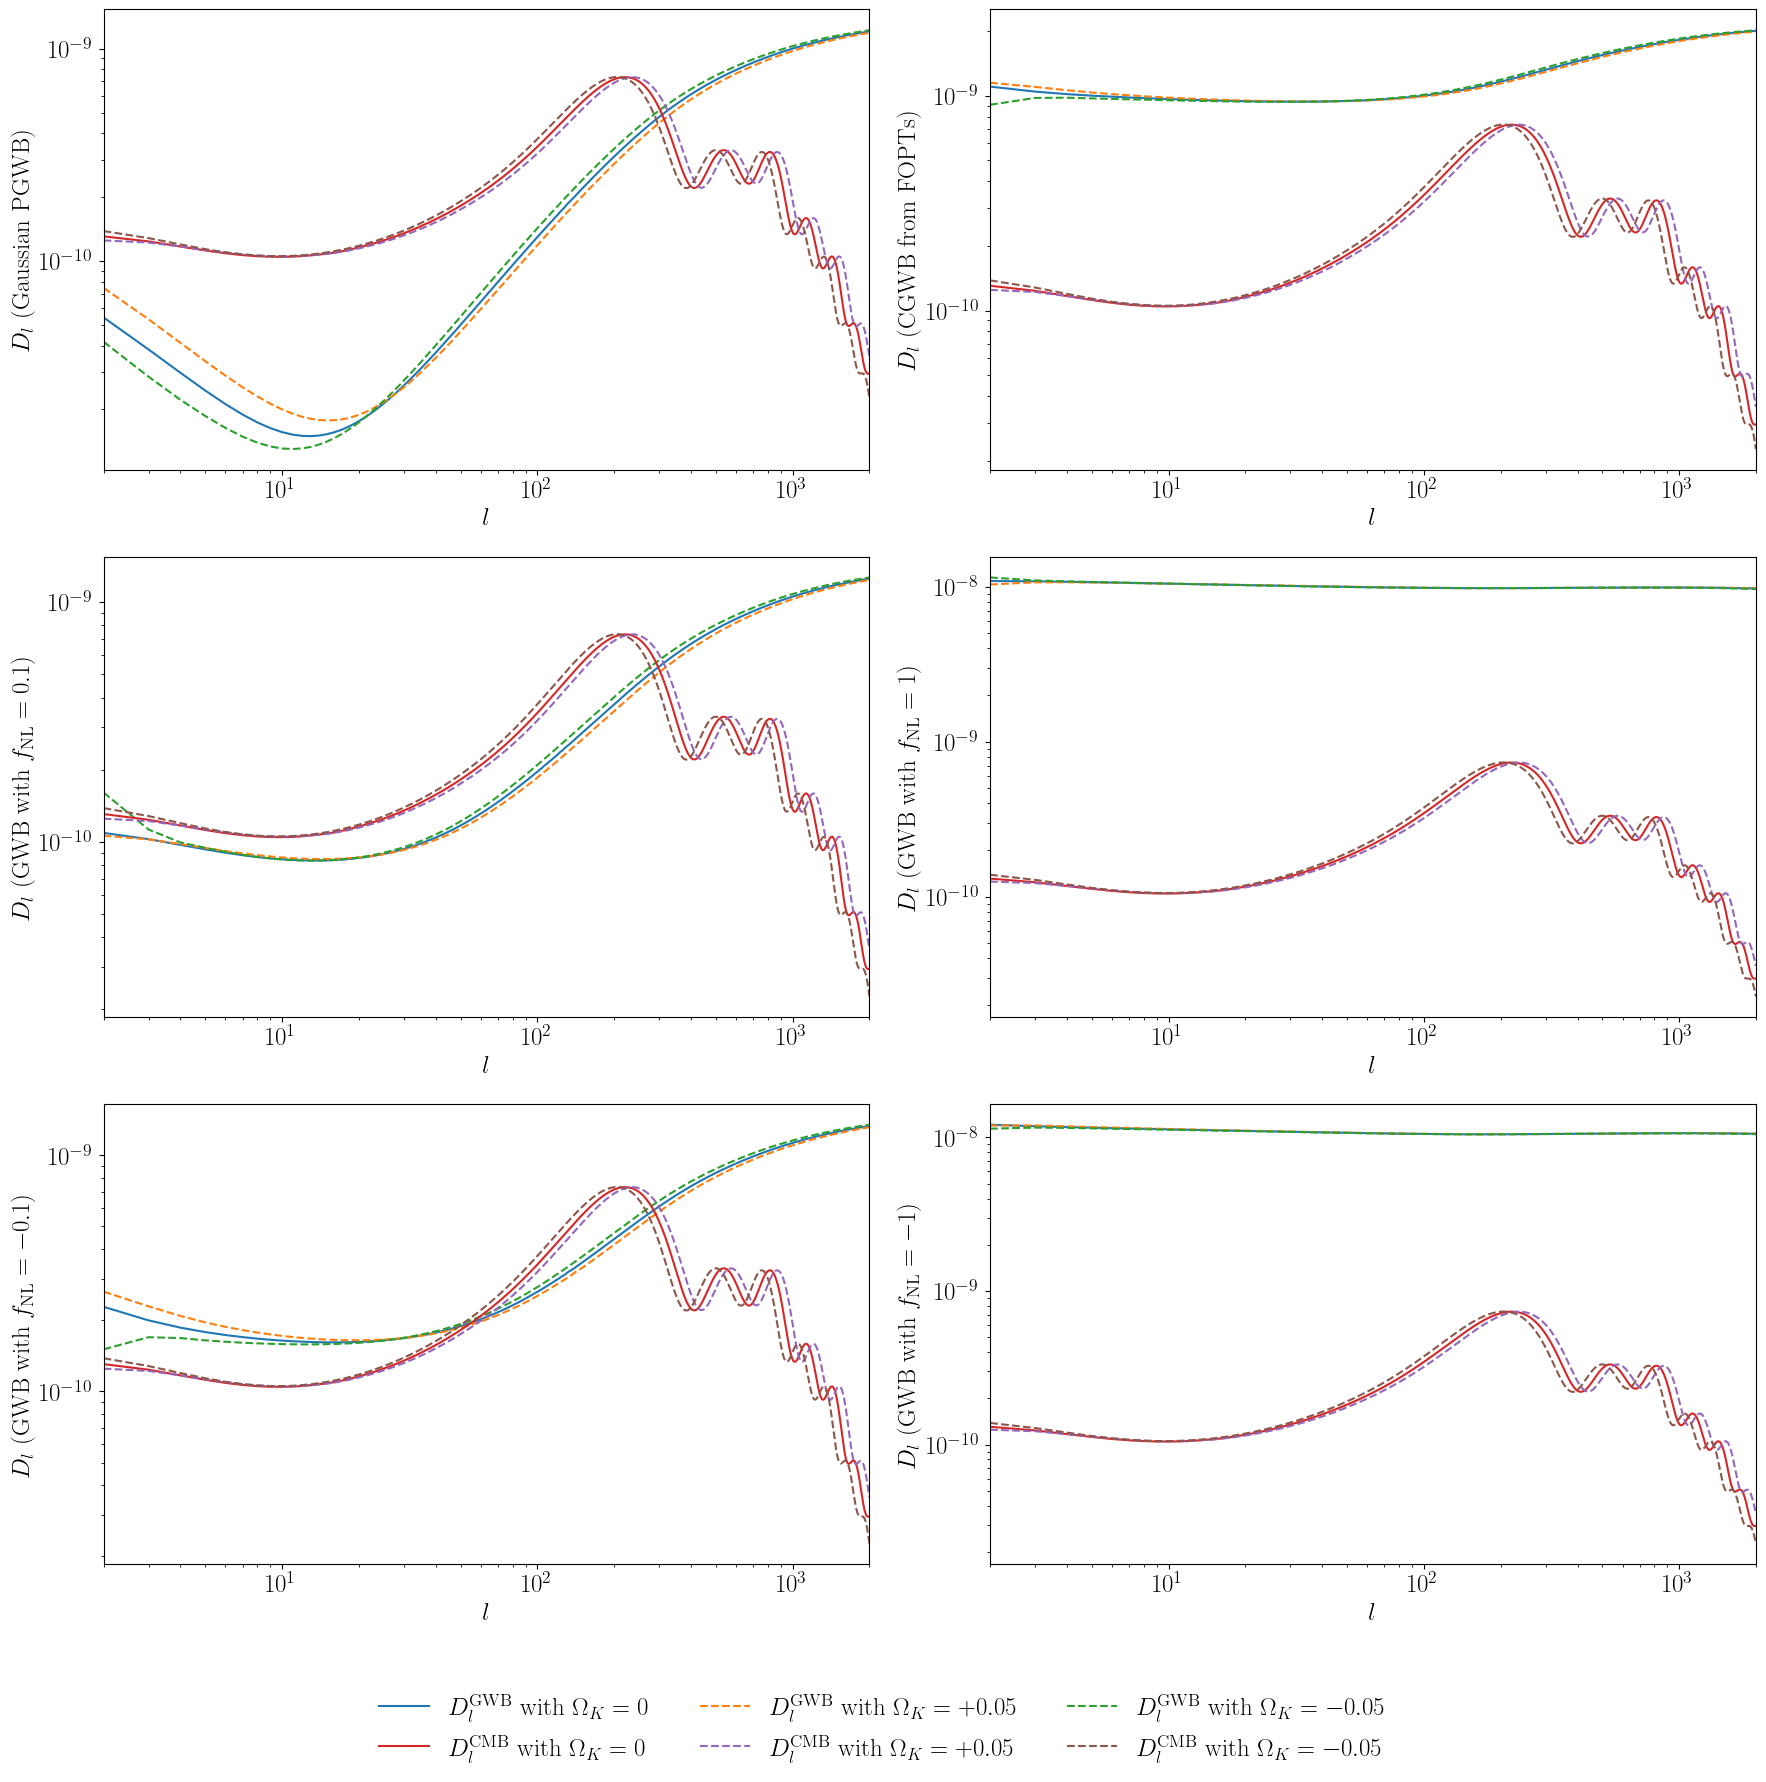

In [ ]:
lstart = 2
lend = -1


fig = plt.figure(figsize=(18, 11.1246*3/2), dpi=100)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 18,
})

ax = plt.subplot(321)
ax.plot(l_array[lstart:lend], Dl_PGWB[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_PGWB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_PGWB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=-0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[0, lstart:lend], '-',  label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_CMB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l$ (Gaussian PGWB)', usetex=True)

ax = plt.subplot(322)
ax.plot(l_array[lstart:lend], Dl_PTGWB[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_PTGWB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_PTGWB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=-0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[0, lstart:lend], '-',  label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_CMB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l$ (CGWB from FOPTs)', usetex=True)

ax = plt.subplot(323)
ax.plot(l_array[lstart:lend], Dl_GWB_f01[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_GWB_f01[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_GWB_f01[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=-0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[0, lstart:lend], '-',  label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_CMB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l$ (GWB with $f_\mathrm{NL}=0.1$)', usetex=True)

ax = plt.subplot(324)
ax.plot(l_array[lstart:lend], Dl_GWB_f1[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_GWB_f1[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_GWB_f1[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=-0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[0, lstart:lend], '-',  label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_CMB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l$ (GWB with $f_\mathrm{NL}=1$)', usetex=True)

ax = plt.subplot(325)
ax.plot(l_array[lstart:lend], Dl_GWB_fm01[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_GWB_fm01[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_GWB_fm01[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=-0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[0, lstart:lend], '-',  label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_CMB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l$ (GWB with $f_\mathrm{NL}=-0.1$)', usetex=True)

ax = plt.subplot(326)
ax.plot(l_array[lstart:lend], Dl_GWB_fm1[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_GWB_fm1[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_GWB_fm1[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}}$ with $\Omega_K=-0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[0, lstart:lend], '-',  label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array[lstart:lend], Dl_CMB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array[lstart:lend], Dl_CMB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l$ (GWB with $f_\mathrm{NL}=-1$)', usetex=True)


lines, labels = fig.axes[-1].get_legend_handles_labels()
lines_p = []
labels_p = []
for i in range(3):
    lines_p.append(lines[i])
    lines_p.append(lines[i+3])
    labels_p.append(labels[i])
    labels_p.append(labels[i+3])

fig.legend(lines_p, labels_p, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol = 3, framealpha=0)
plt.tight_layout()

# plt.savefig('Dl.pdf', bbox_inches = 'tight')

plt.show()

## Cross-correlation with CMB

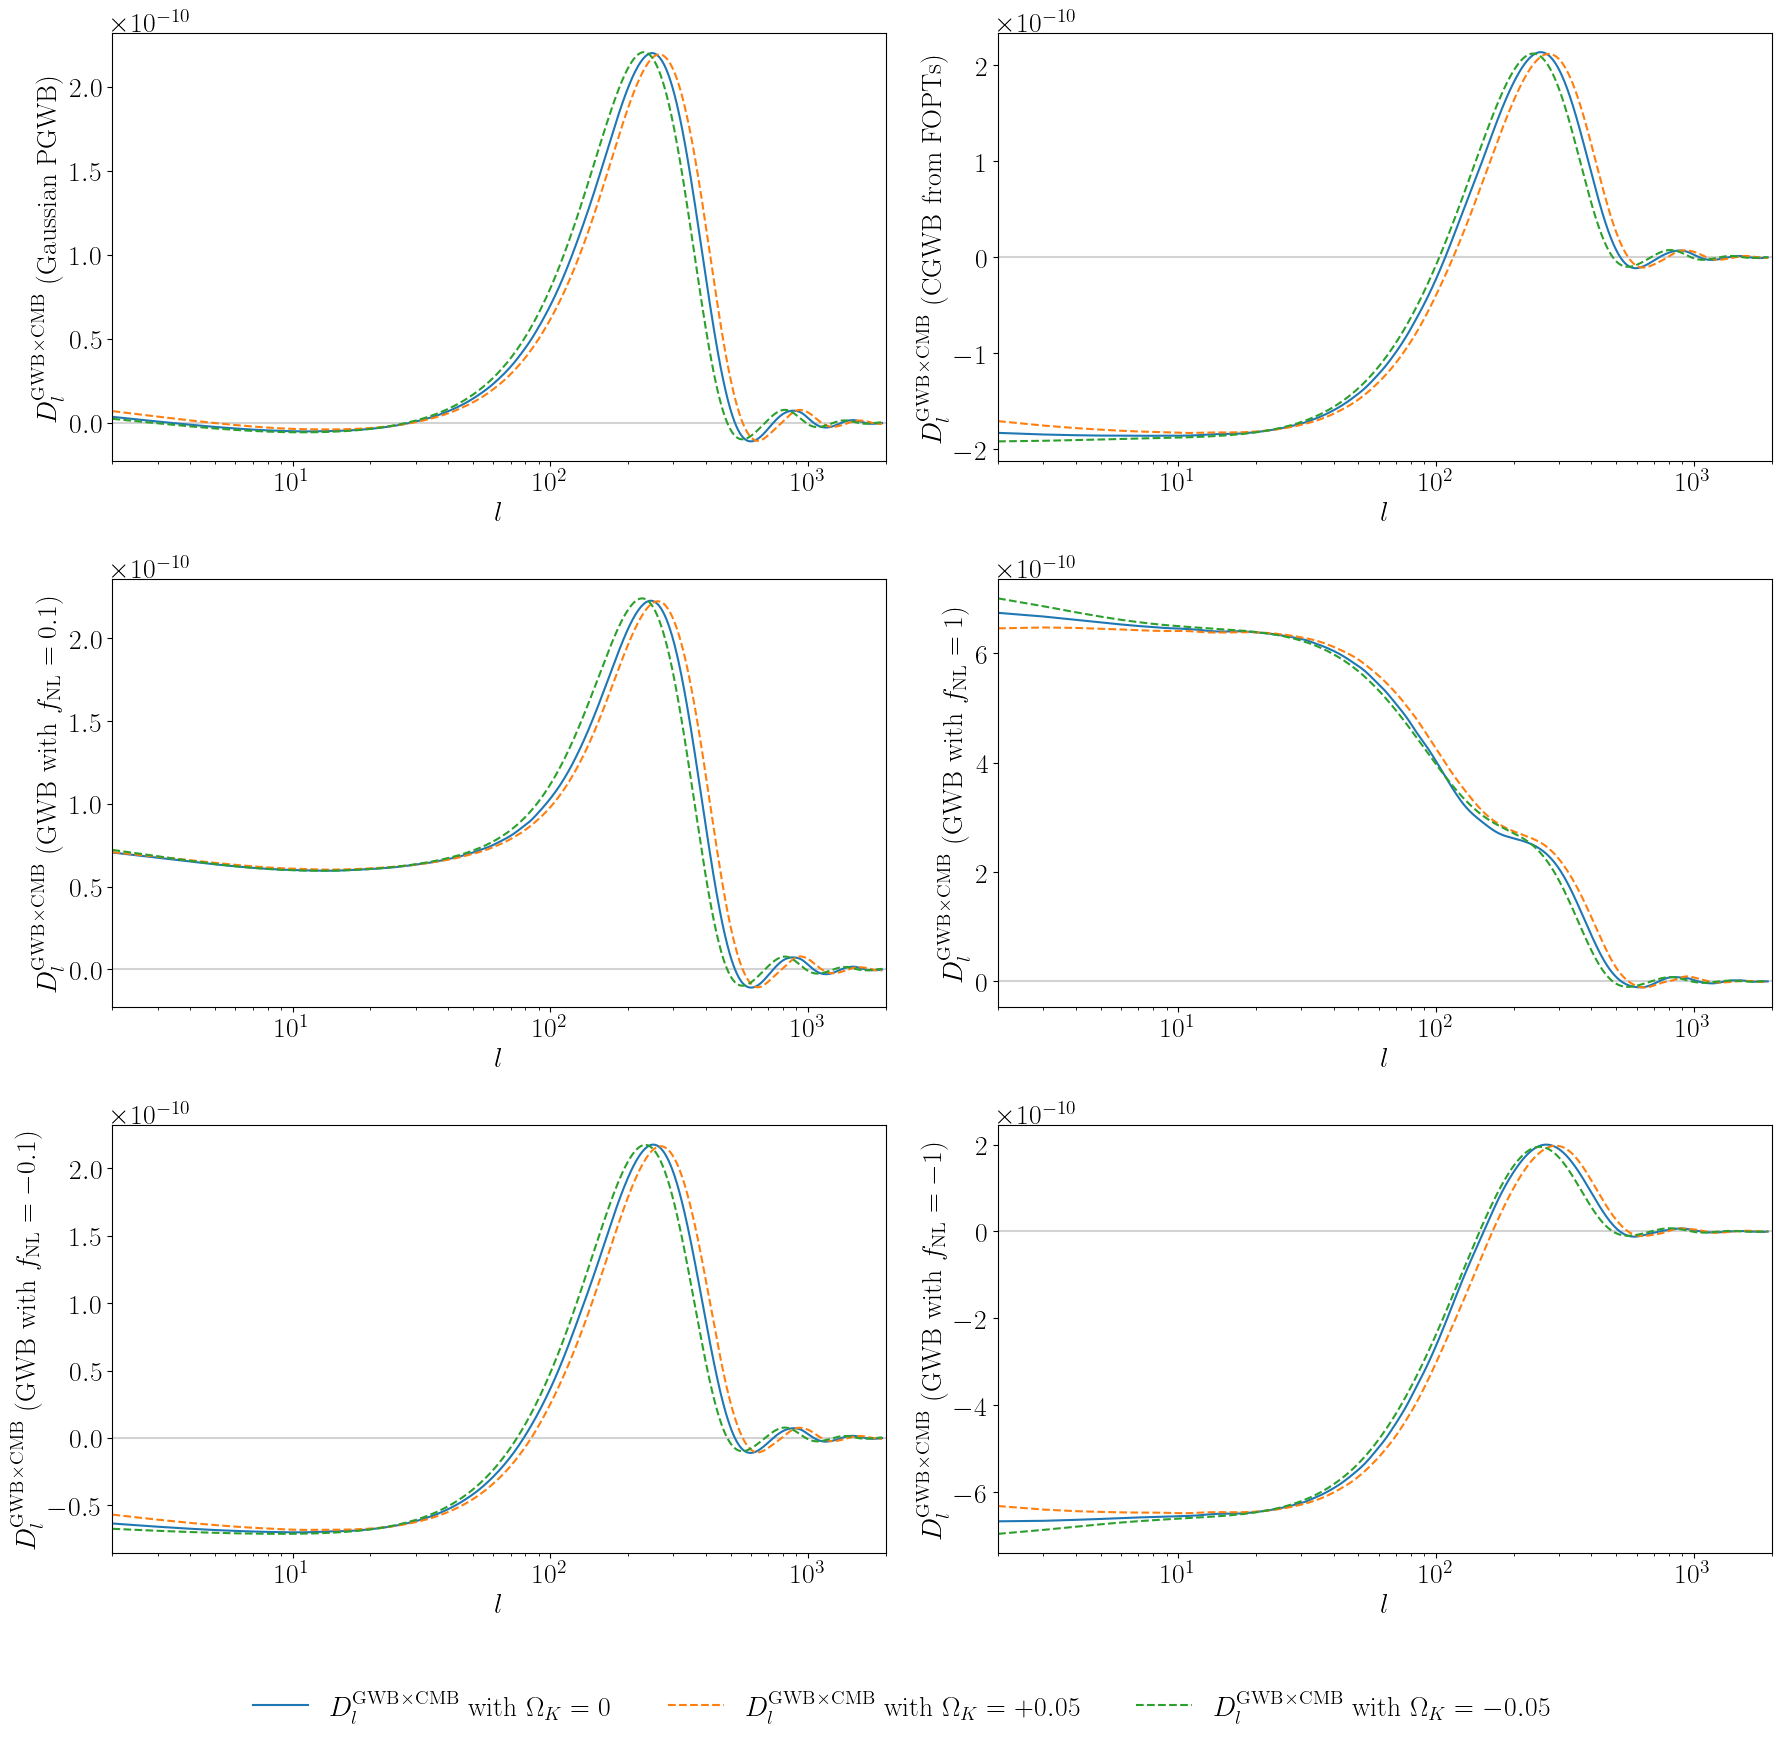

In [ ]:
lstart = 2
lend = 1934


fig = plt.figure(figsize=(18, 11.1246*1.5), dpi=100)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 20,
})

ax = plt.subplot(321)
ax.hlines([0], xmin=0, xmax=2500, colors='lightgray')
ax.plot(l_array_cross[lstart:lend], Cross_PGWB[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array_cross[lstart:lend], Cross_PGWB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array_cross[lstart:lend], Cross_PGWB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ (Gaussian PGWB)', usetex=True)

ax = plt.subplot(322)
ax.hlines([0], xmin=0, xmax=2500, colors='lightgray')
ax.plot(l_array_cross[lstart:lend], Cross_PTGWB[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array_cross[lstart:lend], Cross_PTGWB[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array_cross[lstart:lend], Cross_PTGWB[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ (CGWB from FOPTs)', usetex=True)

ax = plt.subplot(323)
ax.hlines([0], xmin=0, xmax=2500, colors='lightgray')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_f01[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_f01[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_f01[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ (GWB with $f_\mathrm{NL}=0.1$)', usetex=True)

ax = plt.subplot(324)
ax.hlines([0], xmin=0, xmax=2500, colors='lightgray')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_f1[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_f1[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_f1[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ (GWB with $f_\mathrm{NL}=1$)', usetex=True)

ax = plt.subplot(325)
ax.hlines([0], xmin=0, xmax=2500, colors='lightgray')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_fm01[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_fm01[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_fm01[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ (GWB with $f_\mathrm{NL}=-0.1$)', usetex=True)

ax = plt.subplot(326)
ax.hlines([0], xmin=0, xmax=2500, colors='lightgray')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_fm1[0, lstart:lend], '-', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=0$')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_fm1[1, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=+0.05$')
ax.plot(l_array_cross[lstart:lend], Cross_GWB_fm1[2, lstart:lend], '--', label=r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ with $\Omega_K=-0.05$')
plt.xlim([2,2000])
plt.xscale('log')
plt.xlabel(r'$l$', usetex=True)
plt.ylabel(r'$D_l^{\mathrm{GWB}\times\mathrm{CMB}}$ (GWB with $f_\mathrm{NL}=-1$)', usetex=True)


lines, labels = fig.axes[-1].get_legend_handles_labels()

fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.06), ncol = 3, framealpha=0)
plt.tight_layout()

# plt.savefig('cross_correlation.pdf', bbox_inches = 'tight')

plt.show()

## SNR estimation 
The maximum S/N ratio can be estimated by using Fisher’s formula:
$$ \mathrm{SNR}^2 = f_{\mathrm{sky}} \sum_l \frac{(2l+1) (C_l^{\mathrm{cross}})^2 }{\tilde{C}_l^{\mathrm{auto},1} \tilde{C}_l^{\mathrm{auto},2} + (C_l^{\mathrm{cross}})^2}$$
where $\tilde{C}_l^{\mathrm{auto},i} = C_l^{\mathrm{auto},i} + N_l$ with $N_l$ as the noise multipole, and $i=1,2$ denoting different tracers. $f_{\mathrm{sky}}$ is the fraction of sky the observation can cover, which is $1$ for a full sky servy such as Planck, and is approximately $1/3$ for ACT.

In [18]:
SNR_square = []

fsky = 1.
lstart = 2
lend = 1934

# Add the noises, for now simply setting Nl=0
Nl_GWB = np.zeros([3, 2000])
Nl_CMB = np.zeros([3, 2000])

Auto_data =  [Dl_PGWB,    Dl_PTGWB,    Dl_GWB_f01,    Dl_GWB_f1,    Dl_GWB_fm01,    Dl_GWB_fm1]
Cross_data = [Cross_PGWB, Cross_PTGWB, Cross_GWB_f01, Cross_GWB_f1, Cross_GWB_fm01, Cross_GWB_fm1]


for j in range(6):
    # for i in range(3):
    auto = (Auto_data[j] + Nl_GWB)[:, lstart:lend]
    auto_CMB = (Dl_CMB + Nl_CMB)[:, lstart:lend]
    cross = (Cross_data[j])[:, lstart:lend]

    SNR_square_l = fsky * (2* l_array_cross[lstart:lend] + 1) * cross**2 / (auto_CMB*auto + cross**2)
    SNR_square_max = tc.cumsum(tc.tensor(SNR_square_l), dim = -1)
    SNR_square.append(SNR_square_max)


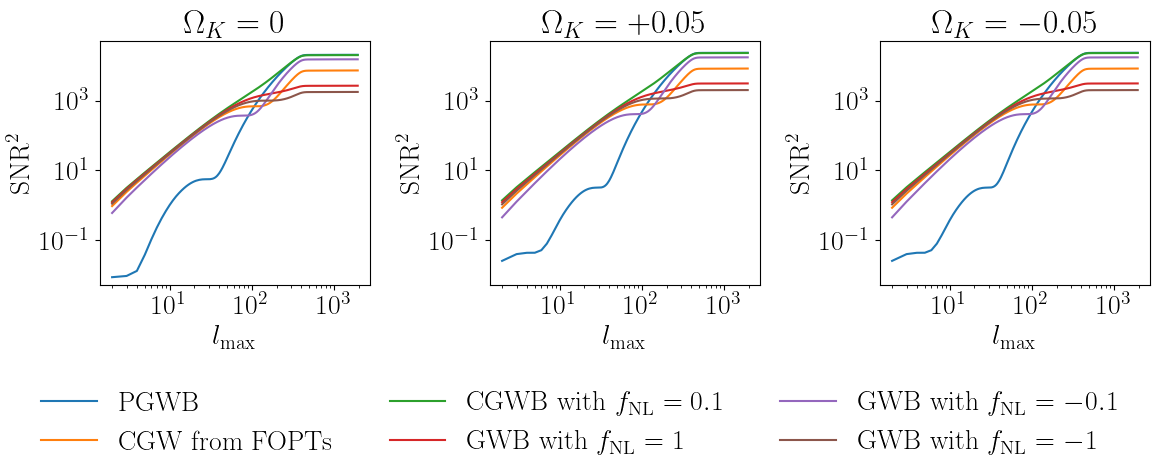

In [44]:
# fig = plt.figure(figsize=(18, 11.1246/3))
fig = plt.figure(figsize=(12, 4))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 20,
})

label_list = ['PGWB', 'CGW from FOPTs', r'CGWB with $f_\mathrm{NL}=0.1$', r'GWB with $f_\mathrm{NL}=1$', r'GWB with $f_\mathrm{NL}=-0.1$', r'GWB with $f_\mathrm{NL}=-1$']

def myplot(axi, data, title, label=None):
    axi.plot(l_array_cross[lstart:lend], data, label = label)
    plt.ylim([5e-3,5e4])
    axi.set_xscale('log')
    axi.set_yscale('log')
    axi.set_xlabel(r'$l_{\mathrm{max}}$', usetex = True)
    axi.set_ylabel(r'${\mathrm{SNR}}^2$', usetex = True)
    axi.set_title(title)


ax = plt.subplot(131)
for i in range(6):
    myplot(ax, SNR_square[i][0], title=r'$\Omega_K = 0$', label=label_list[i])
    

ax = plt.subplot(132)
for i in range(6):
    myplot(ax, SNR_square[i][1], title=r'$\Omega_K = +0.05$', label=label_list[i])

ax = plt.subplot(133)
for i in range(6):
    myplot(ax, SNR_square[i][1], title=r'$\Omega_K = -0.05$', label=label_list[i])


lines, labels = fig.axes[-1].get_legend_handles_labels()
lines_p = []
labels_p = []
for i in range(3):
    lines_p.append(lines[i])
    lines_p.append(lines[i+3])
    labels_p.append(labels[i])
    labels_p.append(labels[i+3])

fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol = 3, framealpha=0)
plt.tight_layout()

# plt.savefig('cross_correlation.pdf', bbox_inches = 'tight')

plt.show()

In [ ]:

# Cross_PGWB_np = np.array([np.array(Cross_PGWB[0]), np.array(Cross_PGWB[1]), np.array(Cross_PGWB[2])])
# Cross_GWB_f01_np = np.array([np.array(Cross_GWB_f01[0]), np.array(Cross_GWB_f01[1]), np.array(Cross_GWB_f01[2])])
# Cross_GWB_f1_np = np.array([np.array(Cross_GWB_f1[0]), np.array(Cross_GWB_f1[1]), np.array(Cross_GWB_f1[2])])
# Cross_GWB_fm01_np = np.array([np.array(Cross_GWB_fm01[0]), np.array(Cross_GWB_fm01[1]), np.array(Cross_GWB_fm01[2])])
# Cross_GWB_fm1_np = np.array([np.array(Cross_GWB_fm1[0]), np.array(Cross_GWB_fm1[1]), np.array(Cross_GWB_fm1[2])])
# Cross_PTGWB_np = np.array([np.array(Cross_PTGWB[0]), np.array(Cross_PTGWB[1]), np.array(Cross_PTGWB[2])])
# np.save('Dl_data/PGWB_CMB_cross.npy', Cross_PGWB_np)
# np.save('Dl_data/GWB_CMB_f01_cross.npy', Cross_GWB_f01_np)
# np.save('Dl_data/GWB_CMB_f1_cross.npy', Cross_GWB_f1_np)
# np.save('Dl_data/GWB_CMB_fm01_cross.npy', Cross_GWB_fm01_np)
# np.save('Dl_data/GWB_CMB_fm1_cross.npy', Cross_GWB_fm1_np)
# np.save('Dl_data/PTGWB_CMB_cross.npy', Cross_PTGWB_np)